In [58]:
import numpy as np
import pandas as pd

#classifiers
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC

#metrics --> Accuracy, recall, precision, F1-score, balanced accuracy
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import balanced_accuracy_score as bacc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as rec

#visualization --> Confusion matrix, precision-recall curve, ROC curve
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import plot_precision_recall_curve as ppc
from sklearn.metrics import plot_roc_curve as prc

#for validation --> Hold-out, Cross-validation, Leave-one-out Cross-validation,
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split as tts

In [5]:
# Some arbitrary data transformation for easier handling

train = pd.read_csv('train.csv') # train data
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train = pd.get_dummies(train)
train = train.fillna(train.median()) #filling up missing values with the median 
test = pd.read_csv('test.csv') # test data
test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.get_dummies(test)
test = test.fillna(test.median())
res = pd.read_csv('gender_submission.csv') # ground truth
res = res['Survived'] #dropped the index column of the data

# Split train to features and targets

Y_train = np.array(train.iloc[:, [0]])
X_train = train.drop(train.iloc[:, [0]].columns, axis=1)

In [37]:
#training with knn classifier

clf = KNC(n_neighbors=10)
clf.fit(X_train, Y_train.ravel())
Y_test = clf.predict(test)
Y_test_prob = clf.predict_proba(test)

In [61]:
#training with SVC

svc = SVC(probability=True, random_state=42)
svc.fit(X_train, Y_train.ravel())
Y_test2 = svc.predict(test)
Y_test_prob2 = svc.predict_proba(test)

In [62]:
#using metrics for KNN

accuracy = acc(res, Y_test)
bal_acc = bacc(res, Y_test)
f1score = f1(res, Y_test)
recall = rec(res, Y_test)

print('accuracy:', accuracy)
print('balanced accuracy:', bal_acc)
print('f1 score:', f1score)
print('recall:', recall)

#for svc

acc_svc = acc(res, Y_test2)
bal_svc = bacc(res, Y_test2)
f1_svc = f1(res, Y_test2)
recall_svc = rec(res, Y_test2)

print('SVC accuracy:', acc_svc)
print('SVC balanced accuracy:', bal_svc)
print('SVC f1 score:', f1_svc)
print('SVC recall:', recall_svc)

accuracy: 0.6818181818181818
balanced accuracy: 0.631578947368421
f1 score: 0.5055762081784387
recall: 0.4473684210526316
SVC accuracy: 0.6555023923444976
SVC balanced accuracy: 0.5742481203007519
SVC f1 score: 0.36842105263157904
SVC recall: 0.27631578947368424


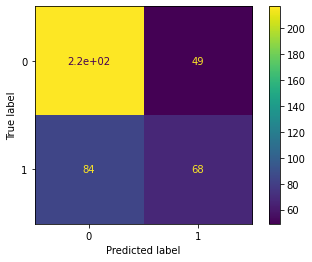

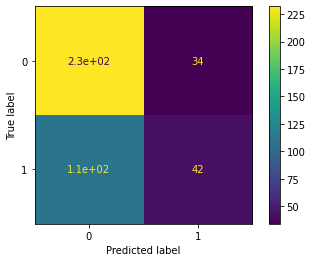

In [63]:
#Plotting the confusion matrix

pcm(clf, test, res)
pcm(svc, test, res)

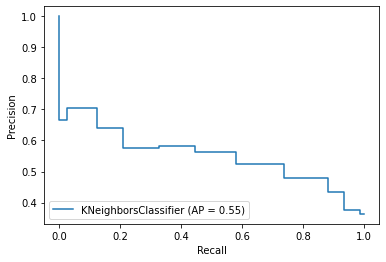

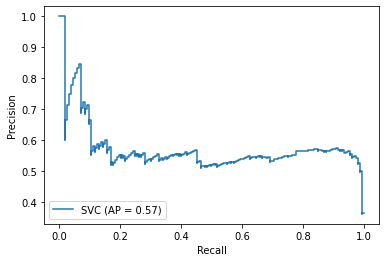

In [52]:
#Plotting precision-recall curve

ppc(clf, test, res)
ppc(svc, test, res)

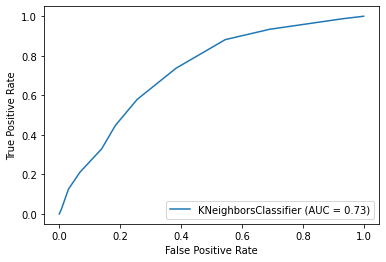

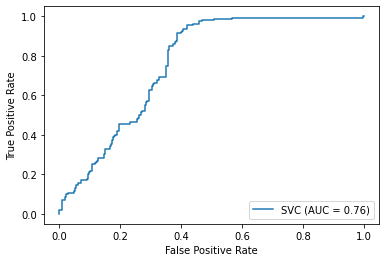

In [53]:
#Plotting the ROC curve

prc(clf, test, res)
prc(svc, test, res)

In [60]:
#Using Cross-Validation

cv_res = cv(clf, X_train, Y_train.ravel(), cv=5)
print(cv_res['test_score'])

cv_res_svc = cv(svc, X_train, Y_train.ravel(), cv=5)
print(cv_res_svc['test_score'])

[0.63687151 0.69662921 0.70786517 0.74719101 0.74719101]
[0.58659218 0.71348315 0.69101124 0.68539326 0.69101124]
891


In [67]:
#using Leave One Out

loo = LeaveOneOut()
loo_res = cv(clf, X_train, Y_train.ravel(), cv=loo)
print(cv_res['test_score'])

loo_res_svc = cv(svc, X_train, Y_train.ravel(), cv=loo)
print(loo_res_svc['test_score'])

[0.63687151 0.69662921 0.70786517 0.74719101 0.74719101]
[1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 